In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  # type: ignore
import numpy as np
import numpy.typing as npt

from data.line import line_curve, line_data
from grid.hyperparameters import (ParameterSpace, expand_grid,
                                  full_data_slices, increasing_subslices,
                                  mean_squared_error_metric,
                                  plot_bayesian_probabilities, plot_metrics,
                                  plot_predictions)
from linear_regression import PolynomialBasisBayesianLinearRegression

In [2]:
l_curve = line_curve()
l_data = line_data(n_train=30, n_test=30, noise_stddev=0.1, slope=-1.0, intercept=0.7)

In [3]:
%%capture
parameter_spaces = [
    ParameterSpace(
        model=PolynomialBasisBayesianLinearRegression,
        keyword="max_evidence_iterations",
        base_parameters={"m_degrees": 2, "beta": 5.0},
        space=[None for _ in range(10)],
        base_data=l_data,
        data_slices=increasing_subslices(0, 30, 10, include_empty=True),
    ),
]

grid = expand_grid(parameter_spaces)

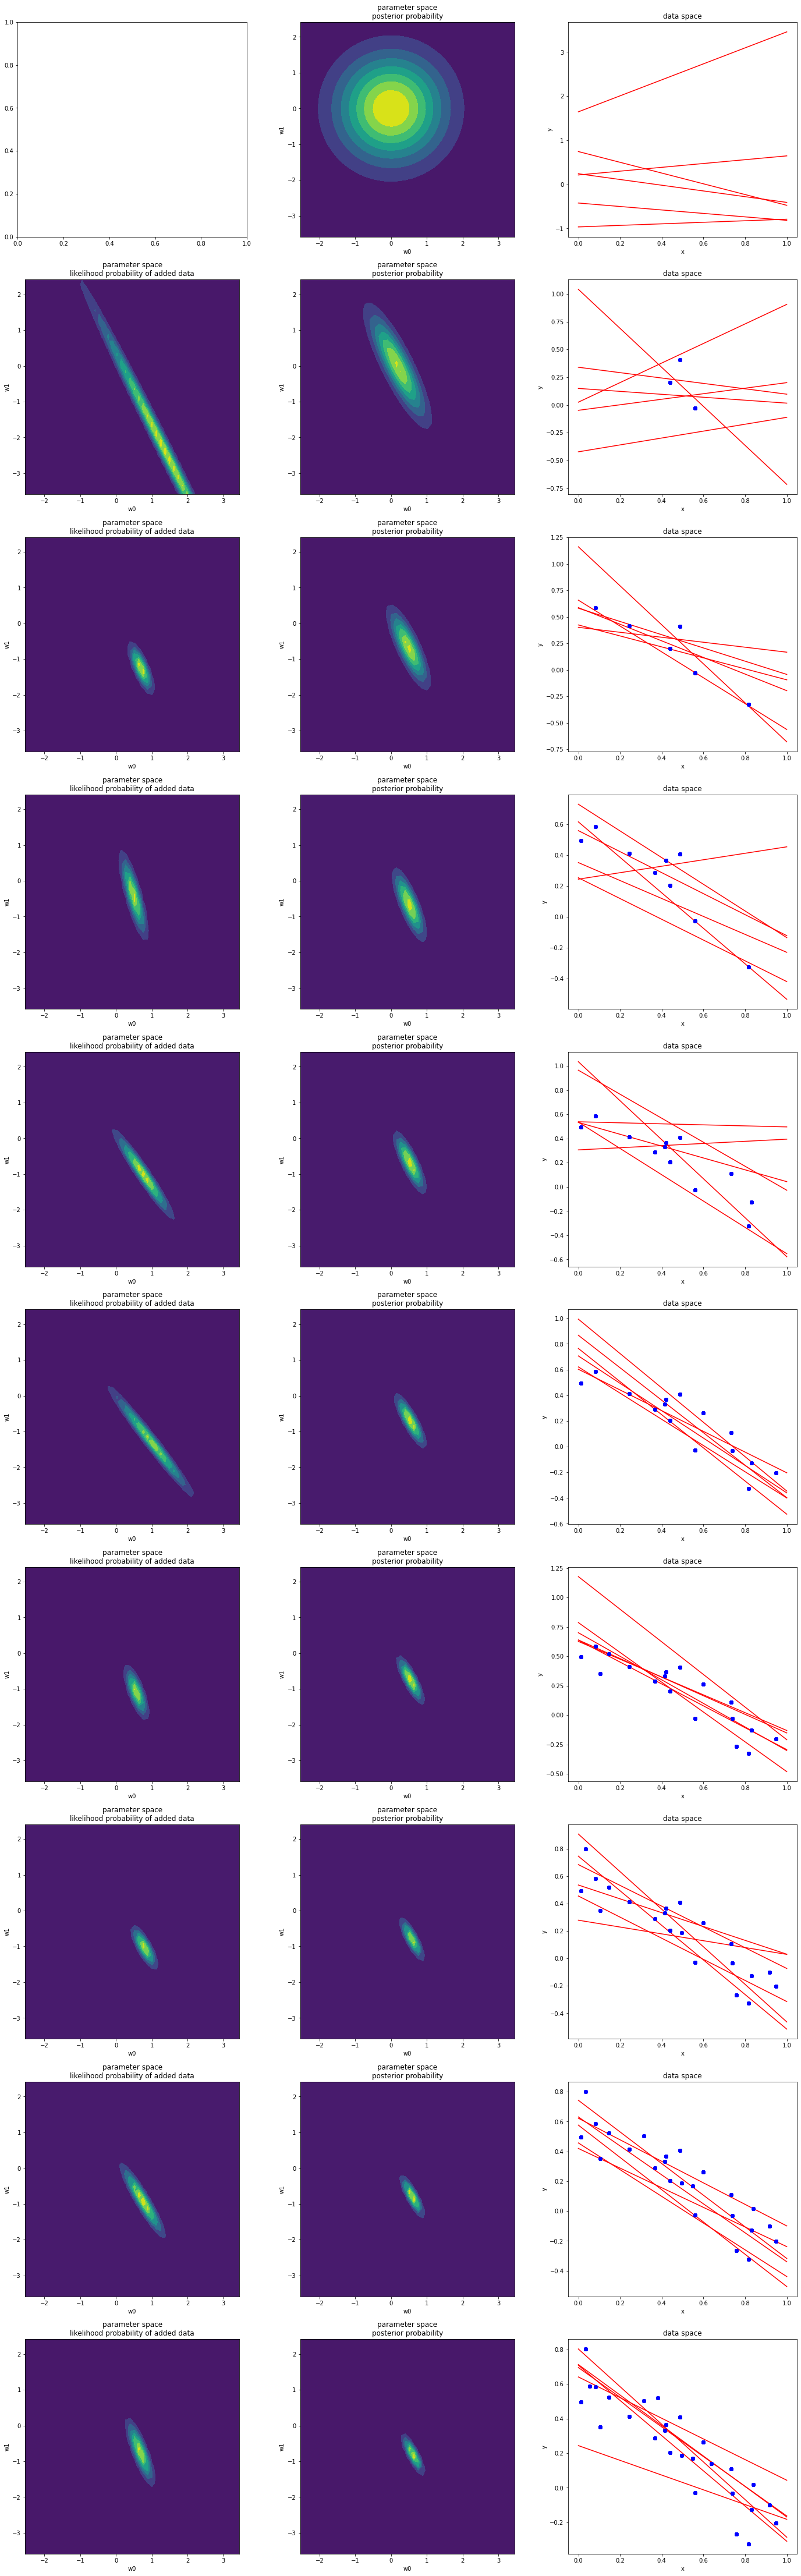

In [4]:
plot_bayesian_probabilities(plt, grid)